In [3]:

import pandas as pd
import numpy as np

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [11]:
address = 'Chennai'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chennai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chennai are 13.0801721, 80.2838331.


In [12]:
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=10)

In [7]:
import requests 
from bs4 import BeautifulSoup 

In [172]:
neighborhoods=pd.read_csv('Chennai_data.csv')
neighborhoods

Location   Latitude  Longitude
0                          Adyar Bus Debot.  12.997222  80.256944
1                              Adyar Signal  13.006389  80.257500
2                                   Alandur  13.007778  80.209722
3                                  Ambattur  13.110000  80.170000
4                                 Anna Arch  13.074444  80.218333
5                       Anna Nagar Roundana  13.084444  80.218056
6                  Anna Nagar West Terminus  13.093056  80.198611
7                               Anna Statue  13.068056  80.271944
8                  Anna University Entrance  13.008056  80.235000
9                                     Avadi  13.120278  80.110000
10                               AVM Studio  13.047778  80.205000
11                           Ayyappa Temple  13.056389  80.231667
12                             Basin Bridge  13.102222  80.271389
13                          Chennai Airport  12.992222  80.169444
14                          Chennai Central  13.082222  80.275556
15     Chennai Mofussil Bus Terminas (CMBT)  13.067778  80.205833
16                     Chennai Trade Center  13.014722  80.191111
17                        Chepaukam Stadium  13.064167  80.266389
18                                  chetput  13.073333  80.242778
19                             Chintadripet  13.071667  80.273889
20                        Chintamani Signal  13.085000  80.224167
21                                    Chola  13.044167  80.259722
22                              Church Park  13.053889  80.254444
23                                    CIPET  13.014167  80.204722
24                       CIT Nagar Roundana  13.031111  80.237222
25                                     CLRI  13.007778  80.242500
26                                      DPI  13.068056  80.248611
27                   Egmore Railway Station  13.077778  80.261667
28                          Ethiraj College  13.063611  80.257222
29                           Gemini Flyover  13.052222  80.251111
30                              Greams Road  13.056389  80.255000
31                       Guindy Race Course  13.004722  80.216944
32                   Guindy Railway Station  13.008333  80.212500
33                               HTL Colony  13.018056  80.207778
34                               IIT Madras  13.005278  80.241944
35                       Indra Nagar, Adyar  12.998889  80.251389
36                                  Isphani  13.055000  80.249722
37                        Kamarajar Arangam  13.048889  80.248056
38                     Kapaleeswarar Temple  13.052778  80.273333
39                  Kasi Viswanathar Temple  13.036111  80.224722
40                   Kasturiba Nagar, Adyar  13.003333  80.247778
41                       Kathipara Junction  13.007222  80.203889
42                              Kodampakkam  13.052222  80.231111
43                               Korukkupet  13.117222  80.277778
44              Koyambedu Omni Bus Terminus  13.068333  80.198333
45                   Koyambedu Super Market  13.067500  80.193889
46                              Le Meridian  13.006667  80.205278
47                              Light House  13.043889  80.277222
48                           Loyolo College  13.063611  80.234722
49                               Madhavaram  13.020000  80.260000
50                           Madhya Kailash  13.006389  80.246944
51                                 Mambalam  13.038889  80.228611
52                                   Manali  13.151389  80.250278
53                              Minambakkam  12.984722  80.177778
54                            MIOT Hospital  13.020278  80.184722
55                             MMM Hospital  13.086111  80.187500
56                                     MRTS  12.967222  80.220000
57                  Mugappair East Terminus  13.080278  80.180556
58                           Mugappair West  13.081944  80.170278
59                            Music Academy  13.045833  80.259444
60       

In [14]:
for lat, lng, location in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Location']):
    label = '{} '.format(location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
    
map_chennai

In [15]:

VERSION = '20180605'

neighborhood_name = neighborhoods.loc[0, 'Location'] # neighborhood name
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

radius = 500 
LIMIT = 100 


url = 'https://api.foursquare.com/v2/venues/explore?&client_id=1TGQHZD1VSOCTBWTFZZJBBGY4SP2KMK1X25LFOKVGBGRB4GX&client_secret=EMJDCRL2U1HNGHCLMNO2GISBUSWFYXVDF43DMEWHS1BWUBB4&v=20180605&ll=13.05222222,80.25111111&radius=500&limit=200'

results = requests.get(url).json()


Latitude and longitude values of Adyar Bus Debot. are 12.99722222, 80.25694444.


In [16]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON


filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

C:\Users\aveen\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


name               categories        lat  \
0                                Aqua                     Pool  13.053010   
1                              Subway           Sandwich Place  13.054787   
2                  Sree Mithai Sweets       Bengali Restaurant  13.054356   
3                 Sigree Global Grill                BBQ Joint  13.053160   
4                    Semmozhi Poongaa                     Park  13.050185   
5                                 601              Coffee Shop  13.053137   
6                     Palmgrove Hotel                    Hotel  13.053160   
7   Menaka, Hotel Palmgroove, Chennai  South Indian Restaurant  13.052834   
8                     The Madras Kafe                     Café  13.055178   
9                             Palimar        Indian Restaurant  13.052770   
10                    Chat On Chinese         Asian Restaurant  13.055375   
11                          Star Rock                Nightclub  13.053180   
12                          The Lotus          Thai Restaurant  13.053110   
13                           The Park                    Hotel  13.053110   
14                              Pasha                Nightclub  13.053301   
15             Dindigul Thalappakatti        Indian Restaurant  13.053834   
16                          Hoppipola                   Lounge  13.053150   
17                     Domino's Pizza              Pizza Place  13.052959   
18                    The Leather Bar                      Bar  13.053161   
19                    Cafe Coffee Day              Coffee Shop  13.055198   
20          Rangis Chinese Restaurant       Chinese Restaurant  13.053877   
21                           In & Out         Department Store  13.049495   
22                            Quiznos           Sandwich Place  13.055275   
23                  Kamarajar Arangam             Concert Hall  13.049108   

          lng  
0   80.250025  
1   80.249618  
2   80.249891  
3   80.248323  
4   80.252080  
5   80.249815  
6   80.247884  
7   80.249249  
8   80.249561  
9   80.250637  
10  80.249505  
11  80.248198  
12  80.249822  
13  80.250125  
14  80.250296  
15  80.250128  
16  80.248316  
17  80.246584  
18  80.250191  
19  80.249471  
20  80.250112  
21  80.253039  
22  80.249646  
23  80.248252

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:

CLIENT_ID = '1TGQHZD1VSOCTBWTFZZJBBGY4SP2KMK1X25LFOKVGBGRB4GX' # your Foursquare ID
CLIENT_SECRET = 'EMJDCRL2U1HNGHCLMNO2GISBUSWFYXVDF43DMEWHS1BWUBB4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1TGQHZD1VSOCTBWTFZZJBBGY4SP2KMK1X25LFOKVGBGRB4GX
CLIENT_SECRET:EMJDCRL2U1HNGHCLMNO2GISBUSWFYXVDF43DMEWHS1BWUBB4


In [20]:
chennai_venues = getNearbyVenues(names=neighborhoods['Location'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Adyar Bus Debot.
Adyar Signal
Alandur
Ambattur
Anna Arch
Anna Nagar Roundana
Anna Nagar West Terminus
Anna Statue
Anna University Entrance
Avadi
AVM Studio
Ayyappa Temple
Basin Bridge
Chennai Airport
Chennai Central
Chennai Mofussil Bus Terminas (CMBT)
Chennai Trade Center
Chepaukam Stadium
chetput
Chintadripet
Chintamani Signal
Chola
Church Park
CIPET
CIT Nagar Roundana
CLRI
DPI
Egmore Railway Station
Ethiraj College
Gemini Flyover
Greams Road
Guindy Race Course
Guindy Railway Station
HTL Colony
IIT Madras
Indra Nagar, Adyar
Isphani
Kamarajar Arangam
Kapaleeswarar Temple
Kasi Viswanathar Temple
Kasturiba Nagar, Adyar
Kathipara Junction
Kodampakkam
Korukkupet
Koyambedu Omni Bus Terminus
Koyambedu Super Market
Le Meridian
Light House
Loyolo College
Madhavaram
Madhya Kailash
Mambalam
Manali
Minambakkam
MIOT Hospital
MMM Hospital
MRTS
Mugappair East Terminus
Mugappair West
Music Academy
Nandanam Signal
Nanganallur
Nehru Nagar, Adyar
Newaharlal Nehru Stadium
Nungampakkam Railway Station
Pa

In [23]:

# one hot encoding
chennai_onehot = pd.get_dummies(chennai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chennai_onehot['Neighborhood'] = chennai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chennai_onehot.columns[-1]] + list(chennai_onehot.columns[:-1])
chennai_onehot = chennai_onehot[fixed_columns]

chennai_onehot

Neighborhood  ATM  Accessories Store  \
0                           Adyar Bus Debot.    0                  0   
1                           Adyar Bus Debot.    0                  0   
2                           Adyar Bus Debot.    0                  0   
3                           Adyar Bus Debot.    0                  0   
4                           Adyar Bus Debot.    0                  0   
5                           Adyar Bus Debot.    0                  0   
6                           Adyar Bus Debot.    0                  0   
7                           Adyar Bus Debot.    0                  0   
8                           Adyar Bus Debot.    0                  0   
9                           Adyar Bus Debot.    0                  0   
10                          Adyar Bus Debot.    0                  0   
11                          Adyar Bus Debot.    0                  0   
12                          Adyar Bus Debot.    0                  0   
13                          Adyar Bus Debot.    0                  0   
14                          Adyar Bus Debot.    0                  0   
15                              Adyar Signal    0                  0   
16                              Adyar Signal    0                  0   
17                              Adyar Signal    0                  0   
18                              Adyar Signal    0                  0   
19                              Adyar Signal    0                  0   
20                              Adyar Signal    0                  0   
21                              Adyar Signal    0                  0   
22                              Adyar Signal    0                  0   
23                              Adyar Signal    0                  0   
24                              Adyar Signal    0                  0   
25                              Adyar Signal    0                  0   
26                              Adyar Signal    0                  0   
27                              Adyar Signal    0                  0   
28                              Adyar Signal    0                  0   
29                              Adyar Signal    0                  0   
30                              Adyar Signal    0                  0   
31                              Adyar Signal    0                  0   
32                              Adyar Signal    0                  0   
33                              Adyar Signal    0                  0   
34                              Adyar Signal    0                  0   
35                              Adyar Signal    0                  0   
36                              Adyar Signal    0                  0   
37                              Adyar Signal    0                  0   
38                              Adyar Signal    0                  0   
39                              Adyar Signal    0                  0   
40                              Adyar Signal    0                  0   
41                              Adyar Signal    0                  0   
42                              Adyar Signal    0                  0   
43                              Adyar Signal    0                  0   
44                              Adyar Signal    0                  0   
45                              Adyar Signal    0                  0   
46                              Adyar Signal    0                  0   
47                              Adyar Signal    0                  0   
48                                   Alandur    0                  0   
49                                   Alandur    0                  0   
50                                   Alandur    0                  0   
51                                   Alandur    0                  0   
52                                   Alandur    0                  0   
53                                   Alandur    0                  0   
54                                   Alandur    0                  0   


In [203]:
chennai_onehot=dc
chennai_grouped = chennai_onehot.groupby('Neighborhood').mean().reset_index()
chennai_grouped

Neighborhood  ATM  Accessories Store  \
0                       Adyar Bus Debot.    0                  0   
1                           Adyar Signal    0                  0   
2                              Anna Arch    0                  0   
3                    Anna Nagar Roundana    0                  0   
4                            Anna Statue    0                  0   
5                        Chennai Central    0                  0   
6   Chennai Mofussil Bus Terminas (CMBT)    0                  0   
7                      Chepaukam Stadium    0                  0   
8                      Chintamani Signal    0                  0   
9                                  Chola    0                  0   
10                           Church Park    0                  0   
11                       Ethiraj College    0                  0   
12                        Gemini Flyover    0                  0   
13                           Greams Road    0                  0   
14                    Indra Nagar, Adyar    0                  0   
15                               Isphani    0                  0   
16                     Kamarajar Arangam    0                  0   
17                           Light House    0                  0   
18                        Loyolo College    0                  0   
19                          MMM Hospital    0                  0   
20                              Mambalam    0                  0   
21                         Music Academy    0                  0   
22                    Nehru Nagar, Adyar    0                  0   
23          Nungampakkam Railway Station    0                  0   
24                          Panagal Park    0                  0   
25                   Park Sheraton Hotel    0                  0   
26                        Shastri Bhavan    0                  0   
27                          Stella Maris    0                  0   
28                        Taj Coromandal    0                  0   
29                      Teynampet Signal    0                  0   
30                             Tharamani    0                  0   
31                      The US Consulate    0                  0   
32                  Thirumangalam Signal    0                  0   
33            Thiruvanmiyur Bus Terminus    0                  0   
34                Thiruvanmiyur Junction    0                  0   
35                            Tidel Park    0                  0   
36                            Triplicane    0                  0   
37                     Vadapalani Signal    0                  0   
38                            Vani Mahal    0                  0   
39                Velachery Bus Terminus    0                  1   
40                    Woodlands Drive In    0                  0   

    African Restaurant  Airport  Airport Terminal  American Restaurant  \
0                    0        0                 0                    0   
1                    0        0                 0                    0   
2                    0        0                 0                    1   
3                    0        0                 0                    0   
4                    0        0                 0                    0   
5                    0        0                 0                    0   
6                    0        0                 0                    0   
7                    0        0                 0                    0   
8                    0        0                 0                    0   
9                    1        0                 0                    0   
10                   0        0                 0                    0   
11                   0        0                 0                    0   
12                   0        0                 0                    0   
13                   0        0                 0                    0   
14                   0        0                 0            

In [204]:
num_top_venues = 5
for hood in chennai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chennai_grouped[chennai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adyar Bus Debot.----
                     venue  freq
0        Indian Restaurant   3.0
1     Fast Food Restaurant   2.0
2         Asian Restaurant   2.0
3  Fruit & Vegetable Store   1.0
4                     Café   1.0


----Adyar Signal----
                     venue  freq
0        Indian Restaurant   9.0
1        Electronics Store   2.0
2  North Indian Restaurant   2.0
3                   Bakery   1.0
4                     Café   1.0


----Anna Arch----
                  venue  freq
0                  Café   2.0
1  Fast Food Restaurant   2.0
2           Pizza Place   1.0
3        Clothing Store   1.0
4        Scenic Lookout   1.0


----Anna Nagar Roundana----
                     venue  freq
0        Indian Restaurant   5.0
1       Chinese Restaurant   2.0
2  South Indian Restaurant   1.0
3     Fast Food Restaurant   1.0
4                Juice Bar   1.0


----Anna Statue----
                   venue  freq
0      Indian Restaurant   5.0
1              Multiplex   2.0
2  General En

In [205]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [206]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chennai_grouped['Neighborhood']

for ind in np.arange(chennai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood          1st Most Common Venue  \
0                       Adyar Bus Debot.              Indian Restaurant   
1                           Adyar Signal              Indian Restaurant   
2                              Anna Arch                           Café   
3                    Anna Nagar Roundana              Indian Restaurant   
4                            Anna Statue              Indian Restaurant   
5                        Chennai Central              Indian Restaurant   
6   Chennai Mofussil Bus Terminas (CMBT)  Vegetarian / Vegan Restaurant   
7                      Chepaukam Stadium              Indian Restaurant   
8                      Chintamani Signal              Indian Restaurant   
9                                  Chola              Indian Restaurant   
10                           Church Park              Indian Restaurant   
11                       Ethiraj College                          Hotel   
12                        Gemini Flyover              Indian Restaurant   
13                           Greams Road                      Multiplex   
14                    Indra Nagar, Adyar                           Café   
15                               Isphani              Indian Restaurant   
16                     Kamarajar Arangam                          Hotel   
17                           Light House           Fast Food Restaurant   
18                        Loyolo College                  Women's Store   
19                          MMM Hospital                    Pizza Place   
20                              Mambalam                 Clothing Store   
21                         Music Academy              Indian Restaurant   
22                    Nehru Nagar, Adyar              Indian Restaurant   
23          Nungampakkam Railway Station                  Women's Store   
24                          Panagal Park                 Clothing Store   
25                   Park Sheraton Hotel                          Hotel   
26                        Shastri Bhavan              Indian Restaurant   
27                          Stella Maris              Indian Restaurant   
28                        Taj Coromandal              Indian Restaurant   
29                      Teynampet Signal              Indian Restaurant   
30                             Tharamani                     Food Court   
31                      The US Consulate              Indian Restaurant   
32                  Thirumangalam Signal              Indian Restaurant   
33            Thiruvanmiyur Bus Terminus              Indian Restaurant   
34                Thiruvanmiyur Junction              Indian Restaurant   
35                            Tidel Park                     Food Court   
36                            Triplicane              Indian Restaurant   
37                     Vadapalani Signal                      Multiplex   
38                            Vani Mahal              Indian Restaurant   
39                Velachery Bus Terminus              Indian Restaurant   
40                    Woodlands Drive In              Indian Restaurant   

      2nd Most Common Venue    3rd Most Common Venue  \
0          Asian Restaurant     Fast Food Restaurant   
1   North Indian Restaurant        Electronics Store   
2      Fast Food Restaurant                Multiplex   
3        Chinese Restaurant  South Indian Restaurant   
4                 Multiplex             Dessert Shop   
5             Train Station                Bookstore   
6      Fast Food Restaurant                    Hotel   
7     General Entertainment        Electronics Store   
8                Restaurant                   Bakery   
9                     Hotel           Ice Cream Shop   
10                Multiplex            Movie Theater   
11                     Café                Juice Bar   
12           Sandwich Place                Nightclub   
13        Indian Restaurant                     Café   
14            Women's Store          

In [207]:

# set number of clusters
kclusters = 5

chennai_grouped_clustering = chennai_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chennai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 0, 3, 4, 4, 4, 3, 4, 4, 0])

In [208]:
labels=pd.DataFrame(kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels']=labels[0]

In [209]:
chennai_data=neighborhoods

In [210]:
chennai_merged=neighborhoods_venues_sorted
chennai_merged.head()

lat = neighborhoods.rename(columns={'Location': 'Neighborhood'})
lat.head()

chennai_merged = pd.merge(neighborhoods_venues_sorted,lat)
chennai_merged.head()

Neighborhood 1st Most Common Venue    2nd Most Common Venue  \
0     Adyar Bus Debot.     Indian Restaurant         Asian Restaurant   
1         Adyar Signal     Indian Restaurant  North Indian Restaurant   
2            Anna Arch                  Café     Fast Food Restaurant   
3  Anna Nagar Roundana     Indian Restaurant       Chinese Restaurant   
4          Anna Statue     Indian Restaurant                Multiplex   

     3rd Most Common Venue          4th Most Common Venue  \
0     Fast Food Restaurant                     Kids Store   
1        Electronics Store                  Shopping Mall   
2                Multiplex                      Bookstore   
3  South Indian Restaurant  Vegetarian / Vegan Restaurant   
4             Dessert Shop                    Flea Market   

     5th Most Common Venue      6th Most Common Venue 7th Most Common Venue  \
0  Fruit & Vegetable Store  Middle Eastern Restaurant                  Café   
1                Rock Club                       Café          Dessert Shop   
2            Shopping Mall          Electronics Store   Sporting Goods Shop   
3                Juice Bar  Middle Eastern Restaurant  Fast Food Restaurant   
4    General Entertainment          Electronics Store      Department Store   

  8th Most Common Venue          9th Most Common Venue 10th Most Common Venue  \
0        Sandwich Place                 Breakfast Spot              BBQ Joint   
1         Movie Theater             Miscellaneous Shop   Fast Food Restaurant   
2           Pizza Place            American Restaurant         Clothing Store   
3     Electronics Store  Paper / Office Supplies Store         Clothing Store   
4                 Diner                     Donut Shop             Food Court   

   Cluster Labels   Latitude  Longitude  
0               4  12.997222  80.256944  
1               0  13.006389  80.257500  
2               3  13.074444  80.218333  
3               4  13.084444  80.218056  
4               4  13.068056  80.271944

In [211]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chennai_merged['Latitude'], chennai_merged['Longitude'], chennai_merged['Neighborhood'], chennai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [260]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 0, chennai_merged.columns[list(range(0,11))] ]

Neighborhood 1st Most Common Venue    2nd Most Common Venue  \
1             Adyar Signal     Indian Restaurant  North Indian Restaurant   
9                    Chola     Indian Restaurant                    Hotel   
10             Church Park     Indian Restaurant                Multiplex   
13             Greams Road             Multiplex        Indian Restaurant   
21           Music Academy     Indian Restaurant                    Hotel   
28          Taj Coromandal     Indian Restaurant                     Café   
39  Velachery Bus Terminus     Indian Restaurant     Fast Food Restaurant   

   3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  \
1      Electronics Store              Shopping Mall             Rock Club   
9         Ice Cream Shop               Concert Hall                   Gym   
10         Movie Theater                     Bakery                  Café   
13                  Café  Middle Eastern Restaurant         Movie Theater   
21                  Café               Concert Hall                Garden   
28    Chinese Restaurant             Sandwich Place    Italian Restaurant   
39        Ice Cream Shop         Chinese Restaurant            Restaurant   

   6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
1                   Café               Dessert Shop         Movie Theater   
9      Kerala Restaurant    Comfort Food Restaurant          Dessert Shop   
10    Chinese Restaurant  Middle Eastern Restaurant                   Bar   
13                Bakery                  Juice Bar    Mexican Restaurant   
21    Mexican Restaurant                     Lounge             Juice Bar   
28          Dessert Shop           Asian Restaurant        Ice Cream Shop   
39           Coffee Shop                  Gift Shop     Accessories Store   

   9th Most Common Venue 10th Most Common Venue  
1     Miscellaneous Shop   Fast Food Restaurant  
9      Electronics Store     Chinese Restaurant  
10             Nightclub     Italian Restaurant  
13            Restaurant                 Bistro  
21    Italian Restaurant         Ice Cream Shop  
28            Restaurant                 Lounge  
39      Ramen Restaurant            Snack Place

In [263]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 1, chennai_merged.columns[list(range(0,11))] ]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
20      Mambalam        Clothing Store         Jewelry Store   
24  Panagal Park        Clothing Store     Indian Restaurant   

   3rd Most Common Venue 4th Most Common Venue    5th Most Common Venue  \
20     Indian Restaurant    Miscellaneous Shop  South Indian Restaurant   
24         Jewelry Store           Snack Place                BBQ Joint   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
20      Asian Restaurant                 Hotel              Boutique   
24              Boutique                  Café           Coffee Shop   

   9th Most Common Venue 10th Most Common Venue  
20        Cosmetics Shop       Department Store  
24          Concert Hall           Dessert Shop

In [261]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 2, chennai_merged.columns[list(range(0,11))] ]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
11      Ethiraj College                 Hotel                  Café   
12       Gemini Flyover     Indian Restaurant        Sandwich Place   
15              Isphani     Indian Restaurant                 Hotel   
16    Kamarajar Arangam                 Hotel                  Café   
25  Park Sheraton Hotel                 Hotel                  Café   
29     Teynampet Signal     Indian Restaurant                Lounge   
31     The US Consulate     Indian Restaurant        Sandwich Place   
37    Vadapalani Signal             Multiplex     Indian Restaurant   
38           Vani Mahal     Indian Restaurant                 Hotel   
40   Woodlands Drive In     Indian Restaurant    Chinese Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
11             Juice Bar      Kebab Restaurant           Pizza Place   
12             Nightclub           Coffee Shop                 Hotel   
15    Chinese Restaurant                Lounge             Nightclub   
16     Indian Restaurant                Lounge             BBQ Joint   
25     Indian Restaurant    Italian Restaurant           Coffee Shop   
29                 Hotel                   Pub    Italian Restaurant   
31             Nightclub           Coffee Shop                 Hotel   
37      Asian Restaurant                 Hotel  Fast Food Restaurant   
38           Coffee Shop        Clothing Store           Music Venue   
40                 Hotel             Nightclub             BBQ Joint   

      6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
11        Indian Restaurant  Middle Eastern Restaurant     Korean Restaurant   
12          Thai Restaurant                  BBQ Joint                Lounge   
15              Coffee Shop                Pizza Place                  Café   
16           Ice Cream Shop                  Nightclub          Concert Hall   
25             Dessert Shop         Chinese Restaurant            Restaurant   
29              Pizza Place                  Juice Bar             BBQ Joint   
31          Thai Restaurant    South Indian Restaurant                  Café   
37  South Indian Restaurant             Clothing Store            Restaurant   
38                 Boutique          Recreation Center             BBQ Joint   
40                     Park                Coffee Shop       Thai Restaurant   

   9th Most Common Venue   10th Most Common Venue  
11            Donut Shop         Asian Restaurant  
12                  Café             Concert Hall  
15        Sandwich Place  South Indian Restaurant  
16                  Park              Coffee Shop  
25   Japanese Restaurant                Nightclub  
29                  Café            Bowling Alley  
31                  Pool       Chinese Restaurant  
37    Italian Restaurant  Comfort Food Restaurant  
38                   Pub         Department Store  
40      Department Store                     Pool

In [264]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 3, chennai_merged.columns[list(range(0,11))] ]

Neighborhood          1st Most Common Venue  \
2                              Anna Arch                           Café   
6   Chennai Mofussil Bus Terminas (CMBT)  Vegetarian / Vegan Restaurant   
14                    Indra Nagar, Adyar                           Café   
17                           Light House           Fast Food Restaurant   
18                        Loyolo College                  Women's Store   
19                          MMM Hospital                    Pizza Place   
23          Nungampakkam Railway Station                  Women's Store   
30                             Tharamani                     Food Court   
35                            Tidel Park                     Food Court   

      2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
2      Fast Food Restaurant             Multiplex             Bookstore   
6      Fast Food Restaurant                 Hotel                  Park   
14            Women's Store        Sandwich Place        Breakfast Spot   
17              Coffee Shop      Sculpture Garden    Athletics & Sports   
18  South Indian Restaurant                Bakery                  Café   
19                   Bakery     Convenience Store      Department Store   
23  South Indian Restaurant      Asian Restaurant    Chinese Restaurant   
30        Indian Restaurant           Bus Station  Fast Food Restaurant   
35                   Office                  Café        Sandwich Place   

   5th Most Common Venue 6th Most Common Venue      7th Most Common Venue  \
2          Shopping Mall     Electronics Store        Sporting Goods Shop   
6          Metro Station      Department Store               Burger Joint   
14    Chinese Restaurant      Department Store                Pizza Place   
17        Sandwich Place           Men's Store              Shopping Mall   
18    Chinese Restaurant        Clothing Store       Fast Food Restaurant   
19           Bus Station          Burger Joint  Middle Eastern Restaurant   
23        Clothing Store      Department Store       Fast Food Restaurant   
30           Snack Place            Restaurant                       Café   
35      Asian Restaurant              Platform                Bus Station   

            8th Most Common Venue          9th Most Common Venue  \
2                     Pizza Place            American Restaurant   
6                        Bus Line                  Women's Store   
14                       Platform              Indian Restaurant   
17                          Beach                            Bar   
18                   Gourmet Shop                 Ice Cream Shop   
19        Fruit & Vegetable Store                      Juice Bar   
23                 Ice Cream Shop  Vegetarian / Vegan Restaurant   
30  Vegetarian / Vegan Restaurant                         Office   
35           Fast Food Restaurant                         Bakery   

           10th Most Common Venue  
2                  Clothing Store  
6                  Farmers Market  
14                     Steakhouse  
17                     Food Court  
18  Vegetarian / Vegan Restaurant  
19              Health Food Store  
23             Mexican Restaurant  
30                 Sandwich Place  
35              Indian Restaurant

In [262]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 4, chennai_merged.columns[list(range(0,11))] ]

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
0             Adyar Bus Debot.     Indian Restaurant       Asian Restaurant   
3          Anna Nagar Roundana     Indian Restaurant     Chinese Restaurant   
4                  Anna Statue     Indian Restaurant              Multiplex   
5              Chennai Central     Indian Restaurant          Train Station   
7            Chepaukam Stadium     Indian Restaurant  General Entertainment   
8            Chintamani Signal     Indian Restaurant             Restaurant   
22          Nehru Nagar, Adyar     Indian Restaurant                   Café   
26              Shastri Bhavan     Indian Restaurant     Chinese Restaurant   
27                Stella Maris     Indian Restaurant                  Hotel   
32        Thirumangalam Signal     Indian Restaurant           Tennis Court   
33  Thiruvanmiyur Bus Terminus     Indian Restaurant     Chinese Restaurant   
34      Thiruvanmiyur Junction     Indian Restaurant     Chinese Restaurant   
36                  Triplicane     Indian Restaurant              Multiplex   

      3rd Most Common Venue          4th Most Common Venue  \
0      Fast Food Restaurant                     Kids Store   
3   South Indian Restaurant  Vegetarian / Vegan Restaurant   
4              Dessert Shop                    Flea Market   
5                 Bookstore                      Nightclub   
7         Electronics Store                      Multiplex   
8                    Bakery             Chinese Restaurant   
22       Chinese Restaurant               Department Store   
26         Asian Restaurant            Japanese Restaurant   
27       Chinese Restaurant             Mexican Restaurant   
32        Mobile Phone Shop                     Smoke Shop   
33                      Gym                      Juice Bar   
34        Indian Sweet Shop                            Gym   
36             Dessert Shop                          Hotel   

             5th Most Common Venue          6th Most Common Venue  \
0          Fruit & Vegetable Store      Middle Eastern Restaurant   
3                        Juice Bar      Middle Eastern Restaurant   
4            General Entertainment              Electronics Store   
5                   Sandwich Place                  Metro Station   
7                             Café                 Breakfast Spot   
8        Middle Eastern Restaurant                     Shoe Store   
22                     Pizza Place                 Sandwich Place   
26  Multicuisine Indian Restaurant              Convenience Store   
27               Kerala Restaurant                      Juice Bar   
32                            Café                  Jewelry Store   
33                       Multiplex  Paper / Office Supplies Store   
34                       Multiplex  Paper / Office Supplies Store   
36           General Entertainment              Electronics Store   

       7th Most Common Venue          8th Most Common Venue  \
0                       Café                 Sandwich Place   
3       Fast Food Restaurant              Electronics Store   
4           Department Store                          Diner   
5                       Café  Vegetarian / Vegan Restaurant   
7   Mediterranean Restaurant                            Bar   
8                Coffee Shop                    Flower Shop   
22      Fast Food Restaurant                 Ice Cream Shop   
26               Coffee Shop                    Pizza Place   
27             Jewelry Store             Italian Restaurant   
32          Department Store                     Print Shop   
33                 Hotel Bar                    Pizza Place   
34                 Hotel Bar                    Pizza Place   
36               Flower Shop                    Flea Market   

            9th Most Common Venue   10th Most Common Venue  
0                  Breakfast Spot                BBQ Joint  
3   Paper / Office Supplies Store           Clothing Store  
4        

In [225]:
chennai_grouped1 = chennai_onehot.groupby('Neighborhood').sum().reset_index()
chennai_grouped1
Num_restaurants=chennai_grouped1[['Neighborhood','Indian Restaurant','Asian Restaurant','Chinese Restaurant','Fast Food Restaurant','Vegetarian / Vegan Restaurant','South Indian Restaurant','Food Court'] ]
Num_restaurants['Cluster']=labels[0]
Num_restaurants

C:\Users\aveen\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Neighborhood  Indian Restaurant  Asian Restaurant  \
0                       Adyar Bus Debot.                  3                 2   
1                           Adyar Signal                  9                 1   
2                              Anna Arch                  0                 0   
3                    Anna Nagar Roundana                  5                 1   
4                            Anna Statue                  5                 0   
5                        Chennai Central                  4                 0   
6   Chennai Mofussil Bus Terminas (CMBT)                  0                 0   
7                      Chepaukam Stadium                  5                 0   
8                      Chintamani Signal                  4                 0   
9                                  Chola                  7                 0   
10                           Church Park                  5                 0   
11                       Ethiraj College                  2                 1   
12                        Gemini Flyover                  2                 1   
13                           Greams Road                  4                 0   
14                    Indra Nagar, Adyar                  1                 0   
15                               Isphani                  6                 1   
16                     Kamarajar Arangam                  2                 0   
17                           Light House                  0                 0   
18                        Loyolo College                  1                 0   
19                          MMM Hospital                  0                 0   
20                              Mambalam                  1                 1   
21                         Music Academy                  6                 0   
22                    Nehru Nagar, Adyar                  4                 0   
23          Nungampakkam Railway Station                  1                 1   
24                          Panagal Park                  5                 0   
25                   Park Sheraton Hotel                  2                 0   
26                        Shastri Bhavan                  5                 1   
27                          Stella Maris                  5                 0   
28                        Taj Coromandal                 10                 2   
29                      Teynampet Signal                  3                 1   
30                             Tharamani                  1                 0   
31                      The US Consulate                  2                 1   
32                  Thirumangalam Signal                  4                 0   
33            Thiruvanmiyur Bus Terminus                  2                 0   
34                Thiruvanmiyur Junction                  2                 0   
35                            Tidel Park                  1                 1   
36                            Triplicane                  6                 0   
37                     Vadapalani Signal                  2                 2   
38                            Vani Mahal                  4                 0   
39                Velachery Bus Terminus                  9                 0   
40                    Woodlands Drive In                  4                 0   

    Chinese Restaurant  Fast Food Restaurant  Vegetarian / Vegan Restaurant  \
0                    0                     2                              0   
1                    0                     1                              1   
2                    0                     2                              0   
3                    2                     1                              1   
4                    0                     0                              0   
5                    0                     0                              1   
6                    0                     2                            

In [254]:
Count_restaurants=Num_restaurants.groupby('Cluster').sum().reset_index()

In [255]:
Count_restaurants.Cluster.replace({0:'Cluster 0', 1: 'Cluster 1',2:'Cluster 2',3:'Cluster 3', 4: 'Cluster 4'}, inplace=True)
Count_restaurants

Cluster  Indian Restaurant  Asian Restaurant  Chinese Restaurant  \
0  Cluster 0                 50                 3                  11   
1  Cluster 1                  6                 1                   0   
2  Cluster 2                 29                 7                  10   
3  Cluster 3                  5                 2                   3   
4  Cluster 4                 54                 4                  11   

   Fast Food Restaurant  Vegetarian / Vegan Restaurant  \
0                     6                              5   
1                     1                              1   
2                     3                              2   
3                    12                              6   
4                     4                              3   

   South Indian Restaurant  Food Court  
0                        3           0  
1                        2           0  
2                        9           0  
3                        2           7  
4                        1           0

In [256]:
Count_restaurants1=Count_restaurants

In [257]:
Count_restaurants1['Total Restaurants']=Count_restaurants1.sum(axis=1)
Count_restaurants1['Number of Neighbourhoods']=[7,2,10,9,13]
Count_restaurants1

Cluster  Indian Restaurant  Asian Restaurant  Chinese Restaurant  \
0  Cluster 0                 50                 3                  11   
1  Cluster 1                  6                 1                   0   
2  Cluster 2                 29                 7                  10   
3  Cluster 3                  5                 2                   3   
4  Cluster 4                 54                 4                  11   

   Fast Food Restaurant  Vegetarian / Vegan Restaurant  \
0                     6                              5   
1                     1                              1   
2                     3                              2   
3                    12                              6   
4                     4                              3   

   South Indian Restaurant  Food Court  Total Restaurants  \
0                        3           0                 78   
1                        2           0                 11   
2                        9           0                 60   
3                        2           7                 37   
4                        1           0                 77   

   Number of Neighbourhoods  
0                         7  
1                         2  
2                        10  
3                         9  
4                        13

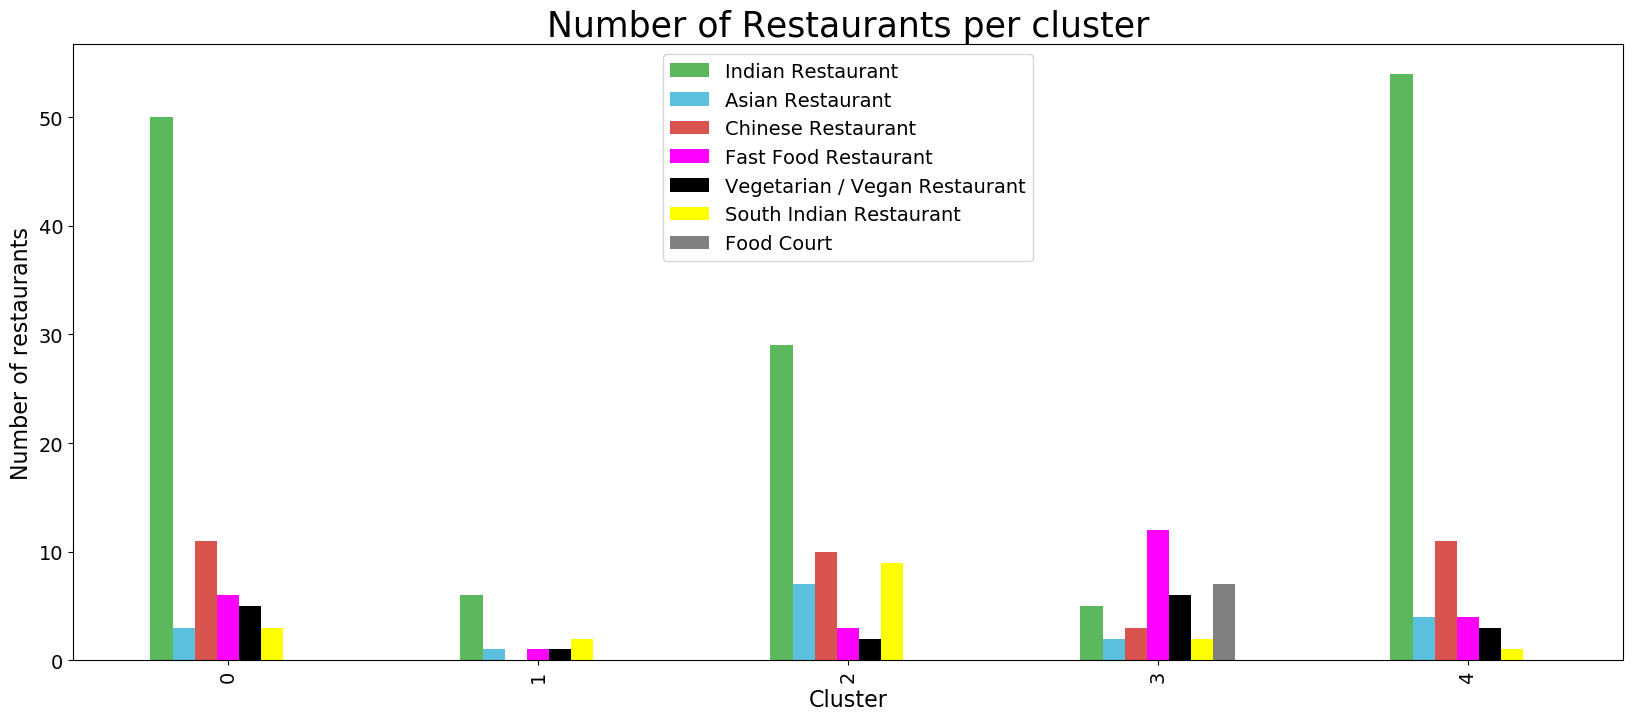

In [239]:
ax=Count_restaurants.plot(kind='bar', figsize=(20, 8), color=['#5cb85c', '#5bc0de', '#d9534f','magenta','black','yellow','grey'], width=0.5)


ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
ax.set_title("Number of Restaurants per cluster", fontsize=25)
ax.set_xlabel('Cluster', fontsize=16)
ax.set_ylabel('Number of restaurants',fontsize=16)
plt.show()

In [192]:
chennai_grouped3=chennai_grouped1
chennai_grouped3['total']=chennai_grouped3.sum(axis=1)

In [195]:
db=chennai_grouped3[chennai_grouped3.total>=10]

In [200]:
db.head()
dc=db.drop('total',axis=1)
dc.head()

Neighborhood  ATM  Accessories Store  African Restaurant  Airport  \
1     Adyar Bus Debot.    0                  0                   0        0   
2         Adyar Signal    0                  0                   0        0   
5            Anna Arch    0                  0                   0        0   
6  Anna Nagar Roundana    0                  0                   0        0   
8          Anna Statue    0                  0                   0        0   

   Airport Terminal  American Restaurant  Amphitheater  Antique Shop  Arcade  \
1                 0                    0             0             0       0   
2                 0                    0             0             0       1   
5                 0                    1             0             0       0   
6                 0                    0             0             0       0   
8                 0                    0             0             0       0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  BBQ Joint  \
1                    0                 2                   0          1   
2                    0                 1                   0          0   
5                    0                 0                   0          0   
6                    0                 1                   0          0   
8                    0                 0                   0          0   

   Bakery  Bar  Beach  Bengali Restaurant  Bistro  Bookstore  Boutique  \
1       0    0      0                   0       0          0         0   
2       1    0      0                   0       0          1         0   
5       0    0      0                   0       0          1         0   
6       0    0      0                   0       0          1         0   
8       0    0      0                   0       0          0         0   

   Bowling Alley  Breakfast Spot  Buffet  Burger Joint  Burrito Place  \
1              0               1       0             0              0   
2              0               0       0             0              0   
5              0               0       0             0              0   
6              0               0       0             0              0   
8              0               0       0             0              0   

   Bus Line  Bus Station  Café  Castle  Chaat Place  Chinese Restaurant  \
1         0            0     1       0            0                   0   
2         0            0     1       0            0                   0   
5         0            0     2       0            0                   0   
6         0            0     1       0            0                   2   
8         0            0     0       0            0                   0   

   Chocolate Shop  Church  Clothing Store  Cocktail Bar  Coffee Shop  \
1               0       0               0             0            0   
2               0       0               0             0            1   
5               0       0               1             0            0   
6               0       0               1             0            1   
8               0       0               0             0            0   

   College Cafeteria  Comfort Food Restaurant  Concert Hall  \
1                  0                        0             0   
2                  0                        0             0   
5                  0                        0             0   
6                  0                        0             0   
8                  0                        0             0   

   Convenience Store  Cosmetics Shop  Department Store  Dessert Shop  Diner  \
1                  0               0                 0             0      0   
2                  0               0                 0             1      0   
5                  0               0                 0             0      0   
6                  0               0                 0             0      0   
8                  0               0                 0       

In [223]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(chennai_grouped_clustering) 
    kmeanModel.fit(chennai_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(chennai_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / chennai_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(chennai_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / chennai_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

TypeError: 'str' object is not callable

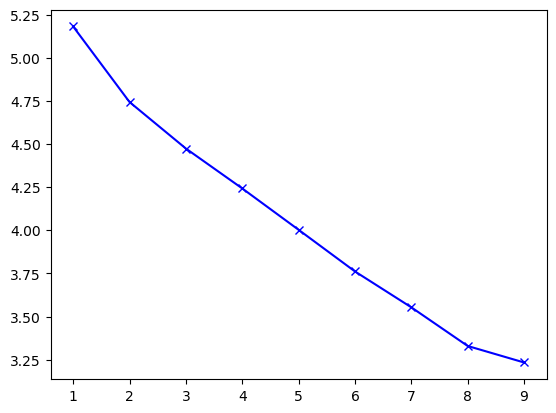

In [224]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [258]:
Count_restaurants1['Restaurants per neighbourhood']=Count_restaurants1['Total Restaurants']/Count_restaurants1['Number of Neighbourhoods']

In [259]:
Count_restaurants1

Cluster  Indian Restaurant  Asian Restaurant  Chinese Restaurant  \
0  Cluster 0                 50                 3                  11   
1  Cluster 1                  6                 1                   0   
2  Cluster 2                 29                 7                  10   
3  Cluster 3                  5                 2                   3   
4  Cluster 4                 54                 4                  11   

   Fast Food Restaurant  Vegetarian / Vegan Restaurant  \
0                     6                              5   
1                     1                              1   
2                     3                              2   
3                    12                              6   
4                     4                              3   

   South Indian Restaurant  Food Court  Total Restaurants  \
0                        3           0                 78   
1                        2           0                 11   
2                        9           0                 60   
3                        2           7                 37   
4                        1           0                 77   

   Number of Neighbourhoods  Restaurants per neighbourhood  
0                         7                      11.142857  
1                         2                       5.500000  
2                        10                       6.000000  
3                         9                       4.111111  
4                        13                       5.923077

In [280]:
cl=Num_restaurants[Num_restaurants.Cluster==3]
cl1=cl.drop('Cluster',axis=1)
cl1['Total']=cl1.sum(axis=1)
cl1

Neighborhood  Indian Restaurant  Asian Restaurant  \
2                              Anna Arch                  0                 0   
6   Chennai Mofussil Bus Terminas (CMBT)                  0                 0   
14                    Indra Nagar, Adyar                  1                 0   
17                           Light House                  0                 0   
18                        Loyolo College                  1                 0   
19                          MMM Hospital                  0                 0   
23          Nungampakkam Railway Station                  1                 1   
30                             Tharamani                  1                 0   
35                            Tidel Park                  1                 1   

    Chinese Restaurant  Fast Food Restaurant  Vegetarian / Vegan Restaurant  \
2                    0                     2                              0   
6                    0                     2                              2   
14                   1                     0                              0   
17                   0                     4                              0   
18                   1                     1                              1   
19                   0                     0                              0   
23                   1                     1                              1   
30                   0                     1                              1   
35                   0                     1                              1   

    South Indian Restaurant  Food Court  Total  
2                         0           0      2  
6                         0           0      4  
14                        0           0      2  
17                        0           1      5  
18                        1           0      5  
19                        0           0      0  
23                        1           0      6  
30                        0           2      5  
35                        0           4      8

In [282]:
cl2=Num_restaurants[Num_restaurants.Cluster==1]
cl3=cl2.drop('Cluster',axis=1)
cl3['Total']=cl3.sum(axis=1)
cl3

Neighborhood  Indian Restaurant  Asian Restaurant  Chinese Restaurant  \
20      Mambalam                  1                 1                   0   
24  Panagal Park                  5                 0                   0   

    Fast Food Restaurant  Vegetarian / Vegan Restaurant  \
20                     0                              0   
24                     1                              1   

    South Indian Restaurant  Food Court  Total  
20                        1           0      3  
24                        1           0      8